In [1]:
import cv2
import os
import xml.etree.ElementTree as ET
from matplotlib import pyplot as plt
import numpy as np
from joblib import Parallel, delayed
import glob
import Fonction as fct


In [2]:

pathToDataSet = os.path.join("/home/mortpo/ESIREM/IA/SuperMaskDetector","DataSet")

pathKaggleAnnotations = os.path.join(pathToDataSet,"Kaggle","annotations")
pathKaggleImages = os.path.join(pathToDataSet,"Kaggle","images")

pathClasseAnnotations = os.path.join(pathToDataSet,"Classe","Annotations")
pathClasseImages = os.path.join(pathToDataSet,"Classe","Images")

KaggleAnnotations = glob.glob(pathKaggleAnnotations+"/*")
ClasseAnnotations = glob.glob(pathClasseAnnotations+"/*")


In [3]:

totalbox = 0
num_with_mask =0
num_with_incorrect_mask = 0
num_without_mask = 0

for xml_file in ClasseAnnotations:
    tree = ET.parse(xml_file)
    root = tree.getroot()

    for boxes in root.iter('object'):

        totalbox +=1
        
        name = boxes.find('name').text
        if "with_mask" in name:
            num_with_mask += 1
        if "without_mask" in name:
            num_without_mask +=1
        if "mask_weared_incorrect" in name or "with_incorrect_mask" in name:
            num_with_incorrect_mask +=1
        
        
print("totalbox :",totalbox)
print("totalImage :",len(ClasseAnnotations))
print("Box Par Image :",totalbox/len(ClasseAnnotations))
print("num_with_mask :",num_with_mask)
print("num_without_mask :",num_without_mask)
print("num_with_incorrect_mask :",num_with_incorrect_mask)

totalbox : 4813
totalImage : 1750
Box Par Image : 2.7502857142857144
num_with_mask : 2670
num_without_mask : 1651
num_with_incorrect_mask : 492


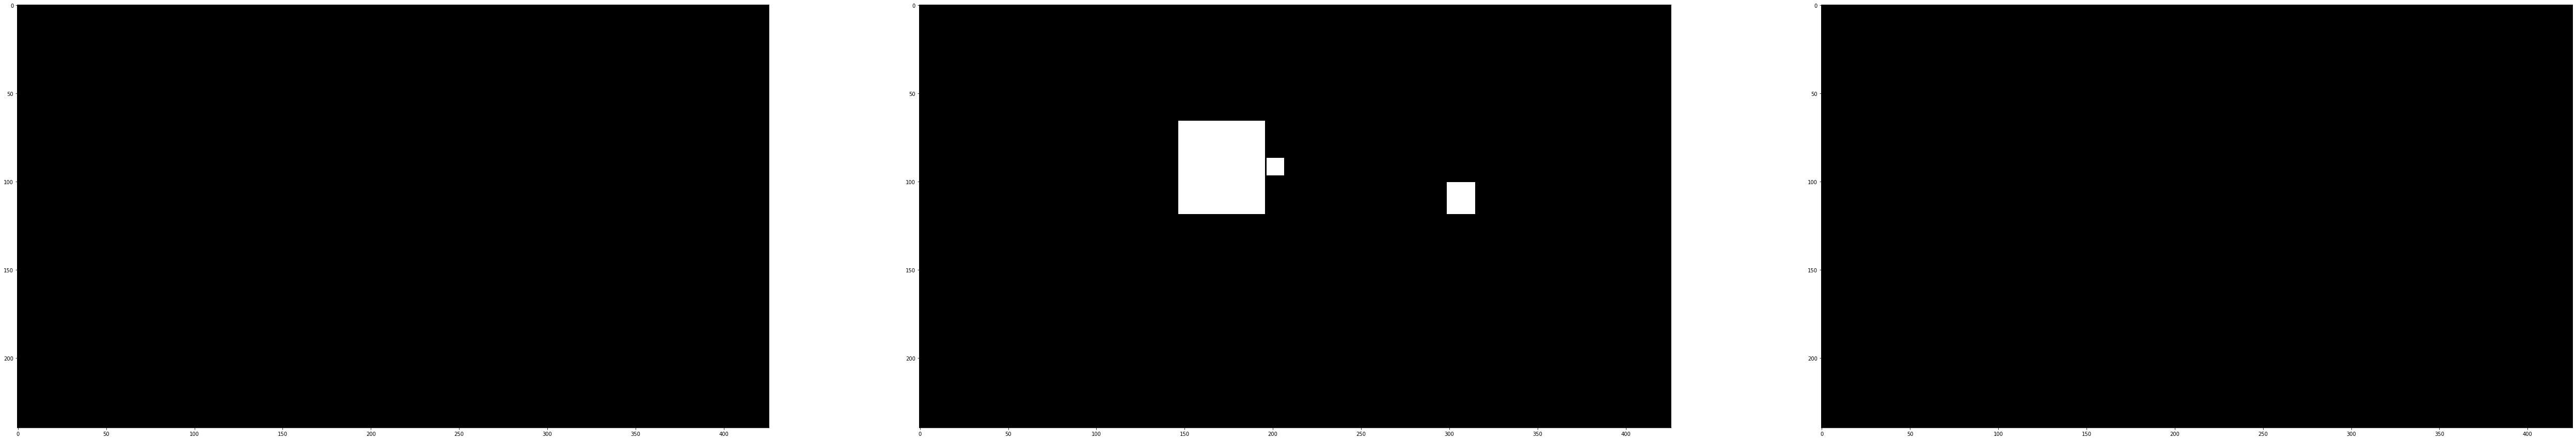

In [5]:

fct.showAnnotation(ClasseAnnotations[6],pathClasseAnnotations,pathClasseImages)